In [1]:
#import 
from utils import *
from data_processing import Ego4d, Ego4d_NQL, Ego4d_VQ, Ego4d_MQ
from collections import defaultdict
import pandas as pd
import numpy as np

In [2]:
dataSetRoot = "./dataset/tmp/"
ego4d_json = dataSetRoot + "ego4d.json"
v1_root = dataSetRoot + "v1/"
annotation_root = v1_root + "annotations/"

In [3]:
ego4D = Ego4d(ego4d_json)

INFO:data_processing:Loading annotations.
INFO:data_processing:Creating index.


In [4]:
nql_train = annotation_root + "nlq_train.json"
nql_val = annotation_root + "nlq_val.json"

In [5]:
nql_dataset_train = Ego4d_NQL(nql_train)
nql_dataset_val = Ego4d_NQL(nql_val)

INFO:data_processing:Loading annotations.
INFO:data_processing:Creating index.
INFO:data_processing:Loading annotations.
INFO:data_processing:Creating index.


In [6]:
vq_train = annotation_root + "vq_train.json"
vq_val = annotation_root + "vq_val.json"

In [7]:
vq_dataset_train = Ego4d_VQ(vq_train)
vq_dataset_val = Ego4d_VQ(vq_val)

INFO:data_processing:Loading annotations.
INFO:data_processing:Creating index.
INFO:data_processing:Loading annotations.
INFO:data_processing:Creating index.


In [8]:
mq_train = annotation_root + "moments_train.json"
mq_val = annotation_root + "moments_val.json"

In [9]:
mq_dataset_train = Ego4d_MQ(mq_train)
mq_dataset_val = Ego4d_MQ(mq_val)

INFO:data_processing:Loading annotations.
INFO:data_processing:Creating index.
INFO:data_processing:Loading annotations.
INFO:data_processing:Creating index.


In [ ]:
#from collections import defaultdict
video_clip_len = defaultdict(int)
for _id, clip_ids in nql_dataset.video_clip.items():
    secs = 0
    for _c_id in clip_ids:
        clip = nql_dataset.clips[_c_id]
        secs += clip['video_end_sec'] - clip['video_start_sec']
    video_clip_len[_id] = int(secs//60)
video_clip_len

In [ ]:
#from collections import defaultdict
video_clip_val_len = defaultdict(int)
for _id, clip_ids in nql_dataset_val.video_clip.items():
    secs = 0
    for _c_id in clip_ids:
        clip = nql_dataset_val.clips[_c_id]
        secs += clip['video_end_sec'] - clip['video_start_sec']
    video_clip_val_len[_id] = int(secs//60)
video_clip_val_len

In [ ]:
video_length = 0
clip_length = 0
for _id, m in video_clip_len.items():
    video_length += video_len[_id]
    clip_length += m

In [ ]:
video_length_val = 0
clip_length_val = 0
for _id, m in video_clip_val_len.items():
    video_length_val += video_len[_id]
    clip_length_val += m

In [ ]:
import pandas as pd

In [ ]:
print(video_length//len(video_clip_len.keys()), clip_length//len(video_clip_len.keys()))

In [ ]:
print(video_length_val//len(video_clip_val_len.keys()), clip_length_val//len(video_clip_val_len.keys()))

In [ ]:
video_clip_len_df = pd.DataFrame.from_dict(video_clip_len.items())
video_len_df = pd.DataFrame.from_dict(video_len.items())
print(video_clip_len_df.head())
print(video_len_df.head())

In [ ]:
len(video_clip_len_df)

In [ ]:
len(video_clip_len_df[video_clip_len_df[1] > 5])

In [ ]:
print(video_clip_len_df[1].mean(), video_clip_len_df[1].max(), video_clip_len_df[1].min())

In [ ]:
video_clip_val_len_df = pd.DataFrame.from_dict(video_clip_val_len.items())
video_len_df = pd.DataFrame.from_dict(video_len.items())
print(video_clip_len_df.head())
print(video_len_df.head())

In [ ]:
len(video_clip_val_len_df)

In [ ]:
len(video_clip_val_len_df[video_clip_val_len_df[1] > 5])

In [ ]:
print(video_clip_val_len_df[1].mean(), video_clip_val_len_df[1].max(), video_clip_val_len_df[1].min())

In [ ]:
len(ego4D.videos.keys())

In [ ]:
print(len(nql_dataset_train.videos.keys()), len(nql_dataset_val.videos.keys()), len(vq_dataset_train.videos.keys()), len(vq_dataset_val.videos.keys()), len(mq_dataset_train.videos.keys()), len(mq_dataset_val.videos.keys()))

In [ ]:
print(len(nql_dataset_train.clips.keys()), len(nql_dataset_val.clips.keys()), len(vq_dataset_train.clips.keys()), len(vq_dataset_val.clips.keys()), len(mq_dataset_train.clips.keys()), len(mq_dataset_val.clips.keys()))

In [ ]:
nlq_video_train_ids = set(nql_dataset_train.videos.keys())
nlq_video_val_ids = set(nql_dataset_val.videos.keys())
vq_video_train_ids = set(vq_dataset_train.videos.keys())
vq_video_val_ids = set(vq_dataset_val.videos.keys())
mq_video_train_ids = set(mq_dataset_train.videos.keys())
mq_video_val_ids = set(mq_dataset_val.videos.keys())

In [ ]:
nlq_union = nlq_video_train_ids.union(nlq_video_val_ids)
vq_union = vq_video_train_ids.union(vq_video_val_ids)
mq_union = mq_video_train_ids.union(mq_video_val_ids)

print(len(nlq_union), len(vq_union), len(mq_union))

In [ ]:
nlq_vq_mq_intersection = nlq_union.intersection(vq_union.intersection(mq_union))

print(len(nlq_vq_mq_intersection))

In [ ]:
duration_sec = 0 
audio_sec = 0
video_duration = defaultdict(int)
audio_duration = defaultdict(int)
for _id in nlq_vq_mq_intersection:
    duration_sec += ego4D.videos[_id]['duration_sec']
    audio_sec += ego4D.videos[_id]['video_metadata']['audio_duration_sec'] if ego4D.videos[_id]['video_metadata']['audio_duration_sec'] != None else 0
    video_duration[_id] = int(ego4D.videos[_id]['duration_sec']//60)
    audio_duration[_id] = int((ego4D.videos[_id]['video_metadata']['audio_duration_sec'] if ego4D.videos[_id]['video_metadata']['audio_duration_sec'] != None else 0)//60)
print( duration_sec//60, 'min,' ,duration_sec//3600, 'hr - of footage')
print(duration_sec//len(nlq_vq_mq_intersection)//60, 'min - average length of video' )
print( audio_sec//60, 'min,' ,audio_sec//3600, 'hr - of audio')
print(audio_sec//len(nlq_vq_mq_intersection)//60, 'min - average length of video' )

In [ ]:
videolength_df = pd.DataFrame.from_dict(video_duration.items())
videolength_df.head()

In [ ]:
audiolength_df = pd.DataFrame.from_dict(audio_duration.items())
audiolength_df.head()

In [ ]:
v_len = 100
print(videolength_df[1].sum(), audiolength_df[1].sum())
print(len(videolength_df[videolength_df[1]<v_len]), len(videolength_df[videolength_df[1]>v_len]), " less than : greater than ", videolength_df[videolength_df[1]<v_len][1].sum(), videolength_df[videolength_df[1]>v_len][1].sum(), "min")
print(len(audiolength_df[videolength_df[1]<v_len]), len(audiolength_df[videolength_df[1]>v_len]), " less than : greater than ", audiolength_df[videolength_df[1]<v_len][1].sum(), audiolength_df[videolength_df[1]>v_len][1].sum(), "min")
print("Video and audio length are same: ",len(audiolength_df[audiolength_df[1] == videolength_df[1]]))
temp_videolength_df = videolength_df[audiolength_df[1] == videolength_df[1]]
print(temp_videolength_df[1].sum(), 'min')
print(len(temp_videolength_df[temp_videolength_df[1]<v_len]), len(temp_videolength_df[temp_videolength_df[1]>v_len]), " less than : greater than " , temp_videolength_df[temp_videolength_df[1]<v_len][1].sum(), temp_videolength_df[temp_videolength_df[1]>v_len][1].sum(), "min")

In [ ]:
sameavlen_nlq_vq_mq_intersection = set(temp_videolength_df[0].to_numpy())
sameavlen_nlq_vq_mq_intersection

In [ ]:
scenarios = defaultdict(set)
split = defaultdict(set)
for _id in nlq_vq_mq_intersection:
    for s in ego4D.videos[_id]['scenarios']:
        scenarios[s].add(_id)
    split[ego4D.videos[_id]['split_em']].add(_id)

In [ ]:
print(len(scenarios.keys()), scenarios.keys())

In [ ]:
print('train: ',len(split['train']), 'val: ',len(split['val']))

In [ ]:
scenarios = defaultdict(set)
split = defaultdict(set)
for _id in sameavlen_nlq_vq_mq_intersection:
    for s in ego4D.videos[_id]['scenarios']:
        scenarios[s].add(_id)
    split[ego4D.videos[_id]['split_em']].add(_id)

In [ ]:
print(len(scenarios.keys()), scenarios.keys())

In [ ]:
print('train: ',len(split['train']), 'val: ',len(split['val']))

In [ ]:
sameavlen_nlq_vq_mq_intersection = set(temp_videolength_df[temp_videolength_df[1]<v_len][0].to_numpy())
#sameavlen_nlq_vq_mq_intersection

In [ ]:
scenarios = defaultdict(set)
split = defaultdict(set)
for _id in sameavlen_nlq_vq_mq_intersection:
    for s in ego4D.videos[_id]['scenarios']:
        scenarios[s].add(_id)
    split[ego4D.videos[_id]['split_em']].add(_id)

In [ ]:
print(len(scenarios.keys()), scenarios.keys())

In [ ]:
print('train: ',len(split['train']), 'val: ',len(split['val']))

In [ ]:
ids = ''
for i, s in enumerate(sameavlen_nlq_vq_mq_intersection):
    ids += s
    if i!= (len(sameavlen_nlq_vq_mq_intersection)-1):
        ids += ' '

In [ ]:
import csv

In [ ]:
f = open('./less_25.csv', 'w')
writer = csv.writer(f)
for i in list(sameavlen_nlq_vq_mq_intersection):
    writer.writerow([i])
f.close()

In [ ]:
ids

In [ ]:
file1 = open("./less_25.txt","w")
file1.write(ids)
file1.close()

In [ ]:
scenarios = defaultdict(set)
for _id, v in ego4D.videos.items():
    for s in v['scenarios']:
        scenarios[s].add(_id)

In [ ]:
len(scenarios['Farmer'])

In [ ]:
ids = ''
scenes = list(scenarios['Farmer'])[:10]
for i, s in enumerate(scenes):
    ids += s
    if i!= (len(scenes)-1):
        ids += ' '

In [ ]:
file1 = open("./less_farming.txt","w")
file1.write(ids)
file1.close()

In [ ]:
audio = defaultdict(int)
for i, v in ego4D.videos.items():
    audio[i] = v['video_metadata']['audio_duration_sec']

audio_df = pd.DataFrame.from_dict(audio.items())
audio_df.head()

In [11]:
nql_dataset_train.clips['fae92e70-88aa-4b77-b41a-5879b74c804c']

{'clip_uid': 'fae92e70-88aa-4b77-b41a-5879b74c804c',
 'video_start_sec': 0.0210286,
 'video_end_sec': 480.0210286,
 'video_start_frame': 1,
 'video_end_frame': 14401,
 'clip_start_sec': 0,
 'clip_end_sec': 480.0,
 'clip_start_frame': 0,
 'clip_end_frame': 14400,
 'source_clip_uid': '51e04dae-3ad0-48c1-b94b-c3ba0edaa99e',
 'annotations': [{'language_queries': [{'clip_start_sec': 0.0,
     'clip_end_sec': 43.6657,
     'video_start_sec': 0.0210286,
     'video_end_sec': 43.6867286,
     'video_start_frame': 1,
     'video_end_frame': 1311,
     'template': 'Objects: How many X’s? (quantity question)',
     'query': 'How many frying pans can i see on the shelf?',
     'slot_x': 'frying pans',
     'verb_x': '[verb_not_applicable]',
     'slot_y': 'i See on the shelf',
     'verb_y': 'see',
     'raw_tags': ['Objects: How many X’s? (quantity question)',
      'How many frying pans can i see on the shelf?',
      'frying pans',
      '[verb_not_applicable]',
      'i See on the shelf',
    

In [41]:
clipAudio_nlq_train = set()
for _id, c in nql_dataset_train.clips.items():
        videoStart = c['clip_start_sec']
        videoEnd = c['clip_end_sec']
        if nql_dataset_train.clip_video[_id] not in ego4D.videos:
            continue
        video = ego4D.videos[nql_dataset_train.clip_video[_id]]
        audioStart = video['video_metadata']['audio_start_sec']
        if video['video_metadata']['audio_duration_sec'] == None:
            continue
        audioEnd = video['video_metadata']['audio_start_sec'] + video['video_metadata']['audio_duration_sec']
        if videoStart >= audioStart and videoStart <= audioEnd and videoEnd >= audioStart and videoEnd <= audioEnd :
            clipAudio_nlq_train.add(_id)

clipAudio_nlq_val = set()
for _id, c in nql_dataset_val.clips.items():
        videoStart = c['clip_start_sec']
        videoEnd = c['clip_end_sec']
        if nql_dataset_val.clip_video[_id] not in ego4D.videos:
            continue
        video = ego4D.videos[nql_dataset_val.clip_video[_id]]
        audioStart = video['video_metadata']['audio_start_sec']
        if video['video_metadata']['audio_duration_sec'] == None:
            continue
        audioEnd = video['video_metadata']['audio_start_sec'] + video['video_metadata']['audio_duration_sec']
        if videoStart >= audioStart and videoStart <= audioEnd and videoEnd >= audioStart and videoEnd <= audioEnd :
            clipAudio_nlq_val.add(_id)

clipAudio_vq_train = set()
for _id, c in vq_dataset_train.clips.items():
        videoStart = c['clip_start_sec']
        videoEnd = c['clip_end_sec']
        if vq_dataset_train.clip_video[_id] not in ego4D.videos:
            continue
        video = ego4D.videos[vq_dataset_train.clip_video[_id]]
        audioStart = video['video_metadata']['audio_start_sec']
        if video['video_metadata']['audio_duration_sec'] == None:
            continue
        audioEnd = video['video_metadata']['audio_start_sec'] + video['video_metadata']['audio_duration_sec']
        if videoStart >= audioStart and videoStart <= audioEnd and videoEnd >= audioStart and videoEnd <= audioEnd :
            clipAudio_vq_train.add(_id)

clipAudio_vq_val = set()            
for _id, c in vq_dataset_val.clips.items():
        videoStart = c['clip_start_sec']
        videoEnd = c['clip_end_sec']
        if vq_dataset_val.clip_video[_id] not in ego4D.videos:
            continue
        video = ego4D.videos[vq_dataset_val.clip_video[_id]]
        audioStart = video['video_metadata']['audio_start_sec']
        if video['video_metadata']['audio_duration_sec'] == None:
            continue
        audioEnd = video['video_metadata']['audio_start_sec'] + video['video_metadata']['audio_duration_sec']
        if videoStart >= audioStart and videoStart <= audioEnd and videoEnd >= audioStart and videoEnd <= audioEnd :
            clipAudio_vq_val.add(_id)

clipAudio_mq_train = set()
for _id, c in mq_dataset_train.clips.items():
        videoStart = c['clip_start_sec']
        videoEnd = c['clip_end_sec']
        if mq_dataset_train.clip_video[_id] not in ego4D.videos:
            continue
        video = ego4D.videos[mq_dataset_train.clip_video[_id]]
        audioStart = video['video_metadata']['audio_start_sec']
        if video['video_metadata']['audio_duration_sec'] == None:
            continue
        audioEnd = video['video_metadata']['audio_start_sec'] + video['video_metadata']['audio_duration_sec']
        if videoStart >= audioStart and videoStart <= audioEnd and videoEnd >= audioStart and videoEnd <= audioEnd :
            clipAudio_mq_train.add(_id)
        
clipAudio_mq_val = set()
for _id, c in mq_dataset_val.clips.items():
        videoStart = c['clip_start_sec']
        videoEnd = c['clip_end_sec']
        if mq_dataset_val.clip_video[_id] not in ego4D.videos:
            continue
        video = ego4D.videos[mq_dataset_val.clip_video[_id]]
        audioStart = video['video_metadata']['audio_start_sec']
        if video['video_metadata']['audio_duration_sec'] == None:
            continue
        audioEnd = video['video_metadata']['audio_start_sec'] + video['video_metadata']['audio_duration_sec']
        if videoStart >= audioStart and videoStart <= audioEnd and videoEnd >= audioStart and videoEnd <= audioEnd :
            clipAudio_mq_val.add(_id)

In [42]:
print(len(nql_dataset_train.clips.keys()), len(nql_dataset_val.clips.keys()), len(clipAudio_nlq_train),len(clipAudio_nlq_val) )
print(len(vq_dataset_train.clips.keys()), len(vq_dataset_val.clips.keys()), len(clipAudio_vq_train), len(clipAudio_vq_val))
print(len(mq_dataset_train.clips.keys()), len(mq_dataset_val.clips.keys()), len(clipAudio_mq_train), len(clipAudio_mq_val))

998 328 624 204
3546 1158 2238 740
1506 528 1074 402


In [49]:
video_ids_nql_train = set()
for _id in clipAudio_nlq_train:
    video_ids_nql_train.add(nql_dataset_train.clip_video[_id])

video_ids_nql_val = set()
for _id in clipAudio_nlq_val:
    video_ids_nql_val.add(nql_dataset_val.clip_video[_id])
    
video_ids_vq_train = set()
for _id in clipAudio_vq_train:
    video_ids_vq_train.add(vq_dataset_train.clip_video[_id])
    
video_ids_vq_val = set()
for _id in clipAudio_vq_val:
    video_ids_vq_val.add(vq_dataset_val.clip_video[_id])
    
video_ids_mq_train = set()
for _id in clipAudio_mq_train:
    video_ids_mq_train.add(mq_dataset_train.clip_video[_id])
    
video_ids_mq_val = set()
for _id in clipAudio_mq_val:
    video_ids_mq_val.add(mq_dataset_val.clip_video[_id])

In [53]:
print(len(nql_dataset_train.videos.keys()),len(nql_dataset_val.videos.keys()),len(vq_dataset_train.videos.keys()),len(vq_dataset_val.videos.keys()),len(mq_dataset_train.videos.keys()),len(mq_dataset_val.videos.keys()))
print(len(video_ids_nql_train),len(video_ids_nql_val),len(video_ids_vq_train),len(video_ids_vq_val),len(video_ids_mq_train),len(video_ids_mq_val))

754 247 1326 422 948 329
505 162 901 289 619 233


In [54]:
nlq_union = video_ids_nql_train.union(video_ids_nql_val)
vq_union = video_ids_vq_train.union(video_ids_vq_val)
mq_union = video_ids_mq_train.union(video_ids_mq_val)

In [55]:
print(len(nlq_union), len(vq_union),len(mq_union))

667 1190 852


In [58]:
nlq_vq_mq = nlq_union.intersection(vq_union.intersection(mq_union))
len(nlq_vq_mq)

155

In [61]:
clip_nql_union = clipAudio_nlq_train.union(clipAudio_nlq_val)
clip_vq_union = clipAudio_vq_train.union(clipAudio_vq_val)
clip_mq_union = clipAudio_mq_train.union(clipAudio_mq_val)
print(len(clip_nql_union), len(clip_vq_union), len(clip_mq_union))

828 2978 1476


In [64]:
clip_nlq_vq_mq = clip_nql_union.union(clip_vq_union.union(clip_mq_union))
len(clip_nlq_vq_mq)

5263

In [66]:
video_clips = defaultdict(set)
for _id in clipAudio_nlq_train:
    idx = nql_dataset_train.clip_video[_id]
    if idx in nlq_vq_mq:
        video_clips[idx].add(_id)

for _id in clipAudio_nlq_val:
    idx = nql_dataset_val.clip_video[_id]
    if idx in nlq_vq_mq:
        video_clips[idx].add(_id)

for _id in clipAudio_vq_train:
    idx = vq_dataset_train.clip_video[_id]
    if idx in nlq_vq_mq:
        video_clips[idx].add(_id)

for _id in clipAudio_vq_val:
    idx = vq_dataset_val.clip_video[_id]
    if idx in nlq_vq_mq:
        video_clips[idx].add(_id)

for _id in clipAudio_mq_train:
    idx = mq_dataset_train.clip_video[_id]
    if idx in nlq_vq_mq:
        video_clips[idx].add(_id)
    
for _id in clipAudio_mq_val:
    idx = mq_dataset_val.clip_video[_id]
    if idx in nlq_vq_mq:
        video_clips[idx].add(_id)    

In [69]:
video_clips

defaultdict(set,
            {'0e6fb738-05fc-4dd5-9746-a8e10efe8c20': {'00bf55c1-af86-4e55-9dc0-f354c4284118',
              '2fb904fc-e8ea-421e-8c16-c06888287d33',
              '37be2ca8-3d26-4c62-9441-f56fea05d1a0',
              '577ff3f6-4521-45d2-a951-d26ccefd9985',
              '6f092d1a-47c6-4206-8f03-36415d35a1dd',
              '79330ae2-2ec9-46ce-b6a9-5e575e832264',
              'caadddca-e07a-40f0-9bec-6fe08b99ad79',
              'd9704759-e346-48df-9e19-4d4e1565c93a',
              'e90af316-b86f-45df-8695-8fbe33294952'},
             'f71187bc-cead-407d-ad14-62812993b6a3': {'200a1cdd-eb1d-4081-ab80-adbab79d9d48',
              '6be4d8a7-bbf7-4e2f-8767-8e8ee88dc6c5',
              '6e3c1e80-94c3-487c-84fd-23424a1308b8',
              '9b668b9c-985c-43bf-9c7a-757571e0c118',
              'a8e9a1b1-7025-40b4-b7df-301345a405c3',
              'c1e8404b-a4fe-4a67-a679-34c64a9bf773',
              'c26fb375-b102-4a12-a4d4-4621407ffb60',
              'fbb24770-fc43-4070-87cb

In [77]:
video_clips_df = pd.DataFrame.from_dict(video_clips.items())
video_clips_df['Length'] = video_clips_df[1].str.len()
video_clips_df.head()

,0,1,Length
0,0e6fb738-05fc-4dd5-9746-a8e10efe8c20,"{00bf55c1-af86-4e55-9dc0-f354c4284118, 2fb904f...",9
1,f71187bc-cead-407d-ad14-62812993b6a3,"{200a1cdd-eb1d-4081-ab80-adbab79d9d48, 9b668b9...",8
2,ea1818bb-a882-4de4-9e31-993f4cb98aa1,"{ebff1abb-c492-4970-ac19-189b1ad46c52, 1507ede...",5
3,e14bb000-250b-4f3d-aec6-e72d4f29d123,"{d585933d-4125-40ab-a832-4bad69d80482, 3187c67...",5
4,89a95cd8-ca13-4edf-807e-d62138fd30e0,"{2d34426b-a4ff-4970-8f82-d6ad8633b580, df8a8cc...",12


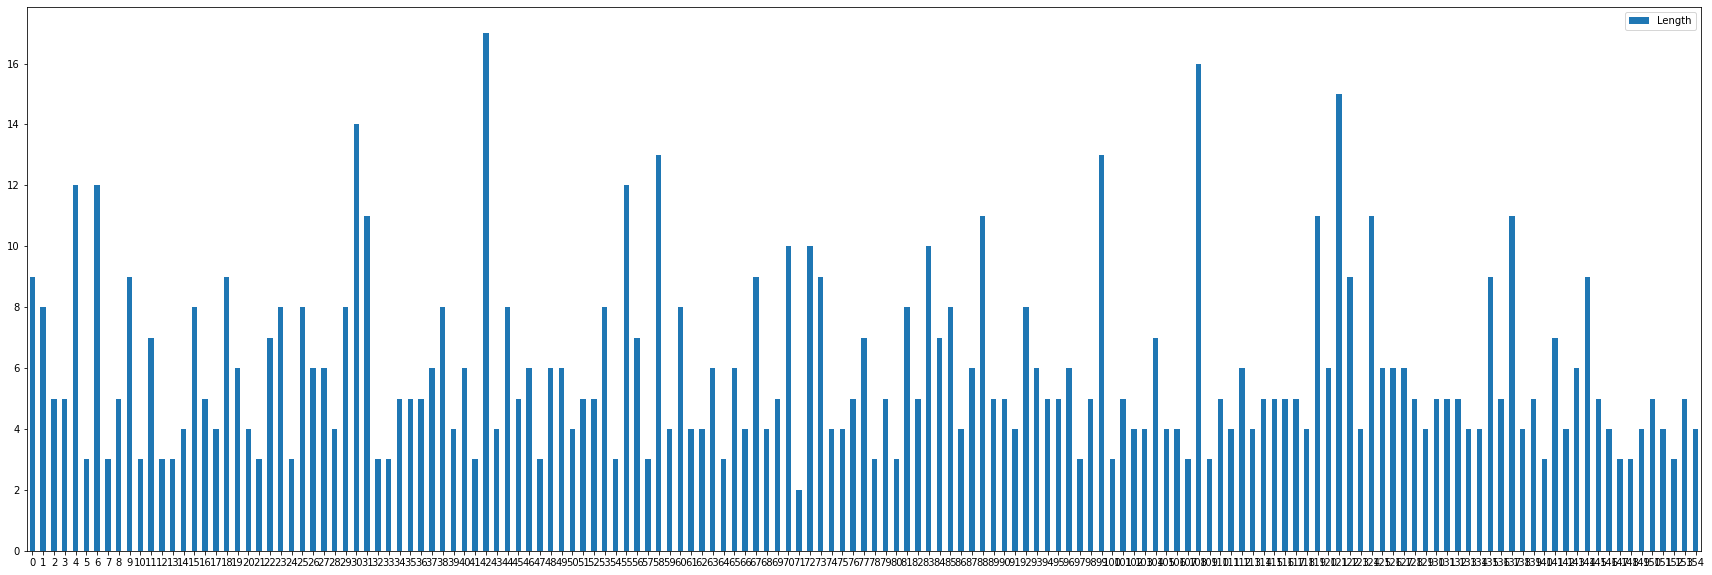

In [83]:
ax = video_clips_df.plot.bar( y='Length', rot=0, figsize=(30, 10))

In [87]:
video_clips_3 = video_clips_df[video_clips_df['Length'] <= 3 ]

In [90]:
ids = ''
for i, s in enumerate(sameavlen_nlq_vq_mq_intersection):
    ids += s
    if i!= (len(sameavlen_nlq_vq_mq_intersection)-1):
        ids += ' '
for i, c in enumerate(video_clips_3[1]):
    for j, _id in enumerate(c):
        ids += _id
        if i 

{'3c3c2fbe-bae2-41ea-8c19-c56f3fca591a', '66a50d0f-67c4-446e-bd43-6a5e2a4ce828', '94b005ce-52d6-41d1-ae7c-1688c8dffcc5'}
{'ba011313-18eb-44d0-92fe-2044b3416d10', '1c6f2ab7-1088-45d6-b172-8bbd2ded74ac', 'e5099ac1-d9fd-4743-a2a9-04579b19622d'}
{'c7f7d9c0-da92-421d-8c5d-ad6581a7ecd2', 'dd59edd0-62d9-4b03-902f-46814114c282', '9d4358df-d03f-46a2-b118-36e578e4876e'}
{'4a056b8e-46ba-405f-aaae-90f7332b94c0', 'c9a8b1bc-a682-4e67-a171-a2f0710df21a', '559bc7df-1c1d-4a5f-95f4-14a9aa6c3353'}
{'2006601a-a632-4aaf-bc80-ec678cb959c7', '2a989137-b75e-4004-97d8-01e99fc03b13', '220b53c7-a2ef-49ec-8351-d8e8f56dab9b'}
{'f5114bde-0a08-4680-82f2-4aa3b60b4b61', '70ffd8b4-7ebc-4efe-b2ba-b99c0423bfe2', '30759fc6-e5be-45e3-8858-da0da250225d'}
{'398e571b-a0ef-4cbf-8247-2141c86682fd', '83c89727-20a6-46bb-9a7f-7ca9e8e61011', '2db7d30a-14c1-40af-96ac-d5d5d45b989a'}
{'11554c88-d19b-4bd0-85a9-e7298a2557f2', 'faa80e03-7d20-4492-afec-bdf6b4f7f0d8', '58345a5f-1572-4244-b6a7-f2cf3f3eb7e0'}
{'364d6bb5-4e97-49b4-980a-c85632

In [88]:
file1 = open("./less_3.txt","w")
file1.write(ids)
file1.close()

,0,1,Length
5,b925520a-853c-442e-8a39-6679cce1e9f4,"{3c3c2fbe-bae2-41ea-8c19-c56f3fca591a, 66a50d0...",3
7,4ff2e551-1ccb-44ce-8b68-09666397f681,"{ba011313-18eb-44d0-92fe-2044b3416d10, 1c6f2ab...",3
10,af7bc929-7fa9-414f-bded-016f2b573229,"{c7f7d9c0-da92-421d-8c5d-ad6581a7ecd2, dd59edd...",3
12,b959f479-0508-4f1b-96a5-1b17e86af8ce,"{4a056b8e-46ba-405f-aaae-90f7332b94c0, c9a8b1b...",3
13,5e193b30-3e79-4851-801b-dab99125cd44,"{2006601a-a632-4aaf-bc80-ec678cb959c7, 2a98913...",3
21,b74101ea-aa00-4e36-b856-b513b021e959,"{f5114bde-0a08-4680-82f2-4aa3b60b4b61, 70ffd8b...",3
24,b8ea1d7f-1928-4699-8b6f-16fdbf5482f1,"{398e571b-a0ef-4cbf-8247-2141c86682fd, 83c8972...",3
32,932dfe2f-0cf1-4b76-b41a-4ca03f6945e5,"{11554c88-d19b-4bd0-85a9-e7298a2557f2, faa80e0...",3
33,7c5a72e2-20dc-49f6-b1e2-23fad9925d24,"{364d6bb5-4e97-49b4-980a-c85632665646, 654eaf0...",3
41,a887acbe-efd5-48e2-ad8b-8e22a3c654d2,"{fa5a0be3-7626-41ad-bf82-5b1a4150a54b, 608ba30...",3
